In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the training datasets for DP and NDP
train_dp = pd.read_csv(r'G:\DataSet\train\trainDP.csv')
train_ndp = pd.read_csv(r'G:\DataSet\train\trainNDP.csv')

# Load the testing datasets for DP and NDP
test_dp = pd.read_csv(r'G:\DataSet\test\testDP.csv')
test_ndp = pd.read_csv(r'G:\DataSet\test\testNDP.csv')

# Combine DP and NDP datasets for training and testing
train_data = pd.concat([train_dp, train_ndp], ignore_index=True)
test_data = pd.concat([test_dp, test_ndp], ignore_index=True)

# Drop problematic columns
train_data = train_data.drop(columns=['FFT', 'Power spectral density'])
test_data = test_data.drop(columns=['FFT', 'Power spectral density'])

# Separate features and target variable for training data
X_train = train_data.drop(columns=['Class'])
y_train = train_data['Class']

# Separate features and target variable for testing data
X_test = test_data.drop(columns=['Class'])
y_test = test_data['Class']

# Encode target variable into numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define Random Forest model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train_encoded)

# Make predictions on the testing data
y_pred_encoded = model.predict(X_test)

# Decode the predicted labels back to original string representations
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Generate classification report
report = classification_report(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print(report)


Accuracy: 0.9786096256684492
               precision    recall  f1-score   support

    Depressed       0.98      0.98      0.98        91
Non Depressed       0.98      0.98      0.98        96

     accuracy                           0.98       187
    macro avg       0.98      0.98      0.98       187
 weighted avg       0.98      0.98      0.98       187



<Figure size 800x600 with 0 Axes>

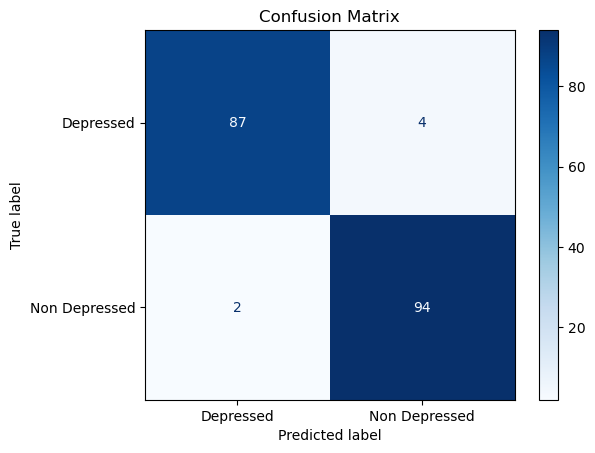

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the training datasets for DP and NDP
train_dp = pd.read_csv(r'G:\DataSet\train\trainDP.csv')
train_ndp = pd.read_csv(r'G:\DataSet\train\trainNDP.csv')

# Load the testing datasets for DP and NDP
test_dp = pd.read_csv(r'G:\DataSet\test\testDP.csv')
test_ndp = pd.read_csv(r'G:\DataSet\test\testNDP.csv')

# Combine DP and NDP datasets for training and testing
train_data = pd.concat([train_dp, train_ndp], ignore_index=True)
test_data = pd.concat([test_dp, test_ndp], ignore_index=True)

# Drop problematic columns
train_data = train_data.drop(columns=['FFT', 'Power spectral density'])
test_data = test_data.drop(columns=['FFT', 'Power spectral density'])

# Separate features and target variable for training data
X_train = train_data.drop(columns=['Class'])
y_train = train_data['Class']

# Separate features and target variable for testing data
X_test = test_data.drop(columns=['Class'])
y_test = test_data['Class']

# Encode target variable into numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define Random Forest model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train_encoded)

# Make predictions on the testing data
y_pred_encoded = model.predict(X_test)

# Decode the predicted labels back to original string representations
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


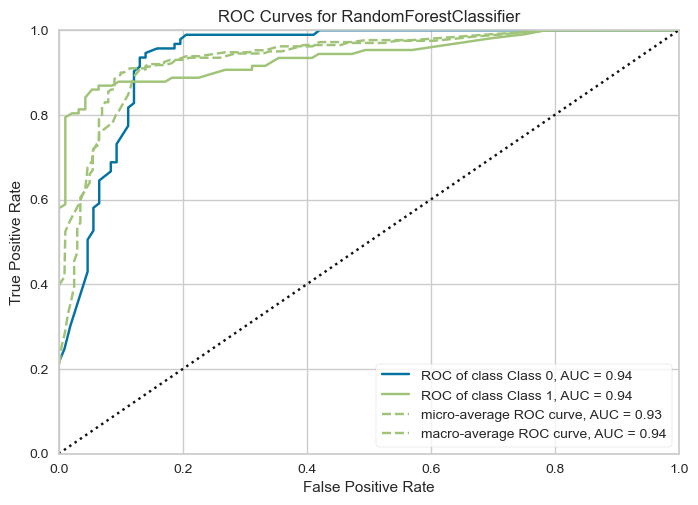

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Instantiate the visualizer with the classifier
visualizer = ROCAUC(model, classes=['Class 0', 'Class 1'])

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw the ROC curve
visualizer.show()


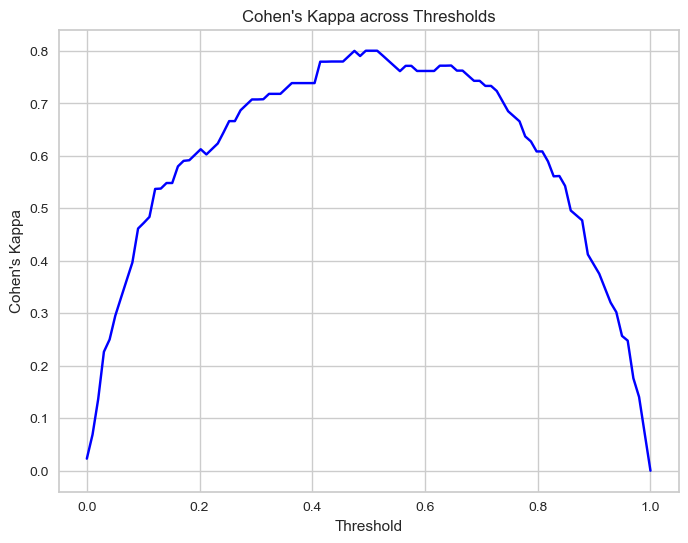

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Varying thresholds (for example, changing the decision threshold for binary classification)
thresholds = np.linspace(0, 1, 100)
kappas = []

# Calculate Cohen's Kappa for each threshold
for threshold in thresholds:
    y_pred_threshold = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    kappas.append(kappa)

# Plot Cohen's Kappa across thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, kappas, color='blue')
plt.title("Cohen's Kappa across Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Cohen's Kappa")
plt.grid(True)
plt.show()


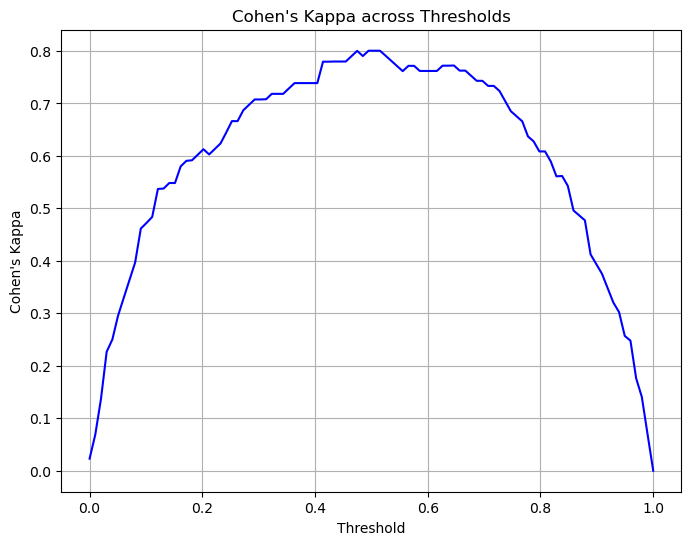

Kappa value at the 50th threshold: 0.8004191198483185


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Varying thresholds (for example, changing the decision threshold for binary classification)
thresholds = np.linspace(0, 1, 100)
kappas = []

# Calculate Cohen's Kappa for each threshold
for threshold in thresholds:
    y_pred_threshold = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    kappas.append(kappa)

# Plot Cohen's Kappa across thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, kappas, color='blue')
plt.title("Cohen's Kappa across Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Cohen's Kappa")
plt.grid(True)
plt.show()

# Find out the Kappa value at the 50th threshold
print("Kappa value at the 50th threshold:", kappas[50])


In [2]:
import numpy as np
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Varying thresholds (for example, changing the decision threshold for binary classification)
thresholds = np.linspace(0, 1, 100)
kappas = []

# Calculate Cohen's Kappa for each threshold
for threshold in thresholds:
    y_pred_threshold = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    kappas.append(kappa)

# Find the threshold with maximum Cohen's Kappa
max_kappa_index = np.argmax(kappas)
max_kappa_threshold = thresholds[max_kappa_index]
max_kappa_value = kappas[max_kappa_index]

print("Maximum Cohen's Kappa:")
print("Threshold:", max_kappa_threshold)
print("Value:", max_kappa_value)


Maximum Cohen's Kappa:
Threshold: 0.494949494949495
Value: 0.8004191198483185
